In [102]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score


df=pd.read_csv('iris.csv',index_col=0)
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


Data size:
(150, 2)


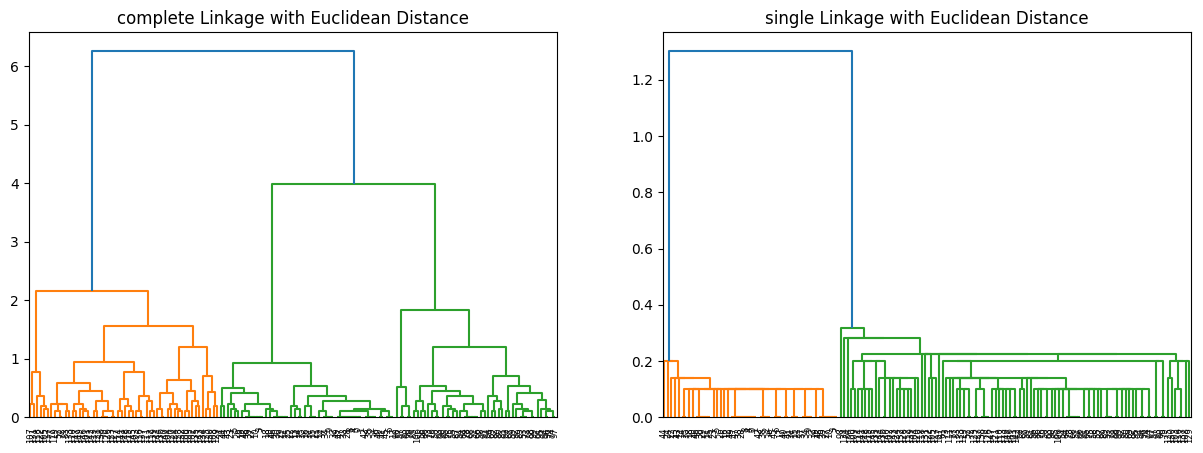

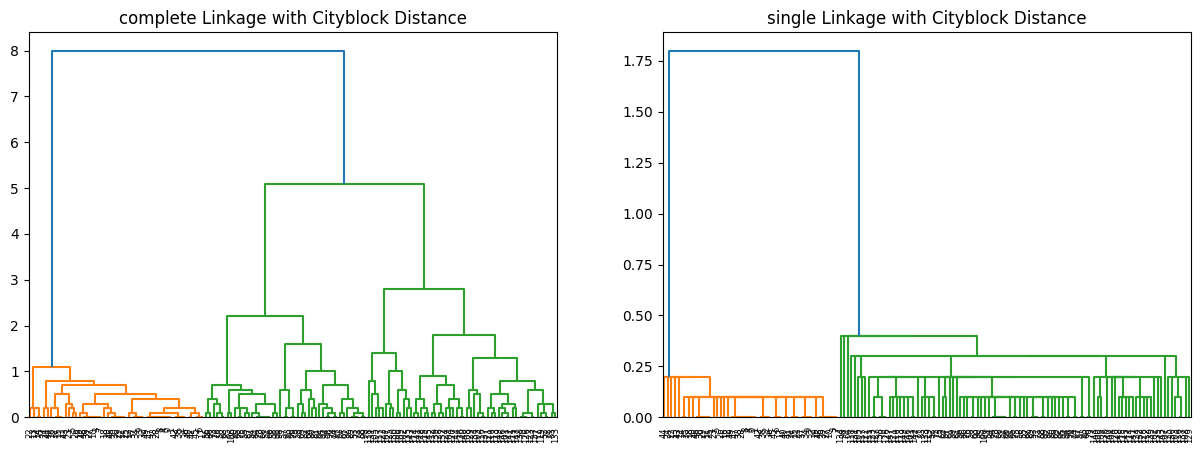

In [103]:
X = df[['PetalLengthCm','PetalWidthCm']].values.reshape(-1,2)  
print('Data size:')
print(X.shape)

linkage_types = ['complete', 'single']

plt.figure(figsize=[15,5])
for i, l in enumerate(linkage_types):
  plt.subplot(1, 2, i+1)
  dend = linkage(X, method=l, metric='euclidean')
  dendrogram(dend, labels=None, leaf_rotation=90, leaf_font_size=6)
  plt.title(f"{l} Linkage with Euclidean Distance")
plt.show()

plt.figure(figsize=[15,5])
for i, l in enumerate(linkage_types):
  plt.subplot(1, 2, i+1)
  dend = linkage(X, method=l, metric='cityblock')
  dendrogram(dend, labels=None, leaf_rotation=90, leaf_font_size=6)
  plt.title(f"{l} Linkage with Cityblock Distance")
plt.show()



For Single linkage with cityblock distance, fixed number of clusters is chosen as 3. 

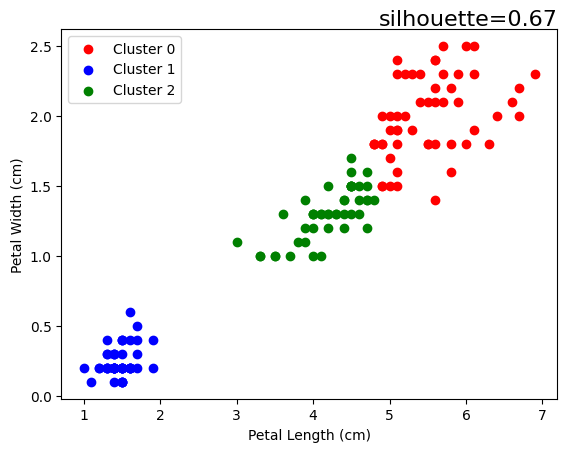

In [104]:
k=3
cluster = AgglomerativeClustering(n_clusters=k, affinity='cityblock', linkage='complete')
y_pred=cluster.fit_predict(X)
colours = 'rbgcmy'
for c in range(k):
  plt.scatter(X[y_pred == c, 0], X[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))

score = round(silhouette_score(X, cluster.labels_, metric='cityblock'),2)
plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()  

The silhouette with agglomerate clustering is higher than that with knn clustering meaning that the clusters are more well defined